# Calculating sulfur and trace element evaluation during mantle melting. 
- This notebook shows how to use the mantle melting model of Lee et al. (2012) adapted by Wieser et al. (2020) to model how S, Cu and other chalcophile or lithophile elements evolve during mantle melting
- For more information on how the math works, we direct you towards the supporting information of Wieser et al (2020) - https://doi.org/10.1016/j.gca.2020.05.018 - Where the equations are typed out in detail

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

# Loading silicate modes and KDs
- Here is the place to enter your modes for the silicate mineralogy and the KD values you want to use. 

In [2]:
Modes=pd.DataFrame(data={'ol': 0.6, 'opx': 0.2, 
       'cpx': 0.18, 'sp': 0.02, 'gt': 0}, index=[0])

KDs_Cu=pd.DataFrame(data={'element': 'Cu',
        'ol': 0.048, 'opx': 0.034, 
        'cpx': 0.043, 'sp': 0.223, 
        'gt': 0, 'sulf': 800}, index=[0])

## Example 1 - no change in silicate mineralogy
- Because the K$_{D}$ of Cu in sulfide is so much higher than the K$_{D}$ in silicate minerals, the silicate mineralogy really doesnt matter much. For less strongly chalcophile elements, e.g. Pb, that wont be the case. In Example 2, we show how you can deal with that issue
- Here, we use 3000 melting steps, run the model from M=1 to M=0.2 (e.g. F from 0 to 0.8), assume sulfides in the mantle have 33 wt% S, and that there is 30 ppm of the element we want to model (Cu here) in the mantle. We assume the mantle initially has 200 ppm of S. 
- Finally, following Lee et al. (2012), here we assume that the S content of the melt is fixed at 980 ppm (their SCSS calculated using ONeill and Mavrogenes 1998 'basalt' model)

In [3]:
S_Sulf = 33*(10**4)
df_Cu_200S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)
df_Cu_200S.head()

,F,M,Cu_KD,Cu_Melt_Agg,Cu_Melt_Inst,Cu_Residue,S_Residue,S_Melt,XSulf
0,0.000000,1.000000,0.532620,0.000000,0.000000,30.000000,200.000000,980.787209,0.000606
1,0.000267,0.999733,0.532114,56.351945,56.351945,29.992969,199.791665,980.787209,0.000605
2,0.000534,0.999466,0.531609,56.372106,56.392268,29.985923,199.583219,980.787209,0.000605
3,0.000800,0.999200,0.531104,56.392294,56.432670,29.978862,199.374662,980.787209,0.000604
4,0.001067,0.998933,0.530598,56.412508,56.473150,29.971787,199.165993,980.787209,0.000604


### Example 1b: We can do the same for any other element, we just need a new set of K$_{D}$s

In [4]:
KDs_Ba=pd.DataFrame(data={'element': 'Ba',
'ol': 0.000005, 'opx': 0.000006, 
'cpx': 0.0004, 'sp': 0.223, 'gt': 0.00007, 'sulf': 0 }, index=[0])

df_Ba_200S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Ba,
                        S_Sulf=S_Sulf, elem_Per=6.85,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)
df_Ba_200S.head()

,F,M,Ba_KD,Ba_Melt_Agg,Ba_Melt_Inst,Ba_Residue,S_Residue,S_Melt,XSulf
0,0.000000,1.000000,0.004533,0.000000,0.000000,6.850000,200.000000,980.787209,0.000606
1,0.000267,0.999733,0.004533,1427.380948,1427.380948,6.470964,199.791665,980.787209,0.000605
2,0.000534,0.999466,0.004533,1387.879475,1348.378001,6.112812,199.583219,980.787209,0.000605
3,0.000800,0.999200,0.004533,1349.829301,1273.728953,5.774398,199.374662,980.787209,0.000604
4,0.001067,0.998933,0.004533,1313.170699,1203.194892,5.454638,199.165993,980.787209,0.000604


### Example 1c - Different initial S contents

In [5]:

df_Cu_100S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=[100],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)

df_Cu_300S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=[300],
                        S_Melt_SCSS_2=980.7872088)

### Now lets plot to see how we expect Cu vs. Ba to evolve for different mantle S contents
- Following Wieser et al. (2020)

Text(0, 0.5, 'S left in Residue (ppm)')

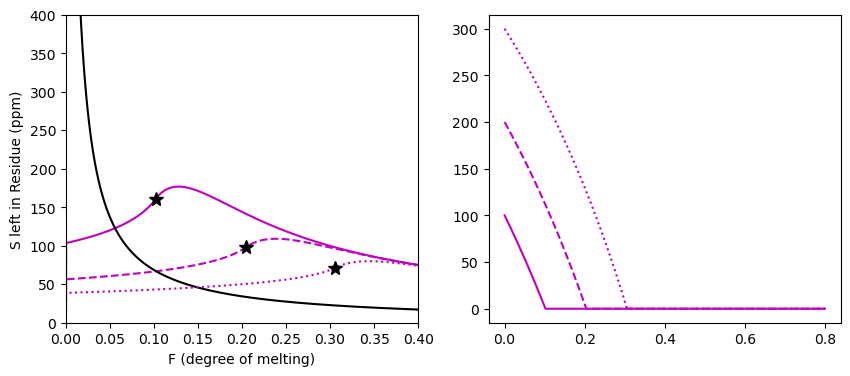

In [31]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10,4))
# 100 ppm
ax1.plot(df_Cu_100S['F'], 
         df_Cu_100S['Cu_Melt_Agg'],
        '-',color='m', ms=10, label='Cu, S=100')
# Lets add a cross to show the point at which sulfide is exhausted
sulf_out_100=np.take(np.where(df_Cu_100S['S_Residue']==0), 0)
ax1.plot(df_Cu_100S['F'].loc[sulf_out_100], 
         df_Cu_100S['Cu_Melt_Agg'].loc[sulf_out_100],
        '*k', ms=10, label='Sulf out')

# 200 ppm
ax1.plot(df_Cu_200S['F'], 
         df_Cu_200S['Cu_Melt_Agg'],
        '--', color='m', ms=10, label='Cu, S=200')
# Lets add a cross to show the point at which sulfide is exhausted
sulf_out_200=np.take(np.where(df_Cu_200S['S_Residue']==0), 0)
ax1.plot(df_Cu_200S['F'].loc[sulf_out_200], 
         df_Cu_200S['Cu_Melt_Agg'].loc[sulf_out_200],
        '*k', ms=10, label='Sulf out')

ax1.plot(df_Ba_200S['F'], 
         df_Ba_200S['Ba_Melt_Agg'],
        '-', color='k', ms=10, label='Ba, S=200')
# 300pm 
ax1.plot(df_Cu_300S['F'], 
         df_Cu_300S['Cu_Melt_Agg'],
        ':', color='m',ms=10, label='Cu, S=300')
# Lets add a cross to show the point at which sulfide is exhausted
sulf_out_300=np.take(np.where(df_Cu_300S['S_Residue']==0), 0)
ax1.plot(df_Cu_300S['F'].loc[sulf_out_300], 
         df_Cu_300S['Cu_Melt_Agg'].loc[sulf_out_300],
        '*k', ms=10, label='Sulf out')


ax1.set_xlabel('F (degree of melting)')
ax1.set_ylabel('Conc in Aggregated melt (ppm)')
ax1.set_xlim([0, 0.4])
ax1.set_ylim([0, 400])

# Show S left in source
ax2.plot(df_Cu_300S['F'],
         df_Cu_300S['S_Residue'],
':', color='m', label='Cu, 300ppm')
ax2.plot(df_Cu_100S['F'],
         df_Cu_100S['S_Residue'],
'-', color='m', label='Cu, 100ppm')
ax2.plot(df_Cu_200S['F'],
         df_Cu_200S['S_Residue'],
'--', color='m', label='Cu, 200ppm')
ax1.set_xlabel('F (degree of melting)')
ax1.set_ylabel('S left in Residue (ppm)')

## Example 2: Changing Silicate proportions
- Here, we load in a changing silicate mineral mineralogy. This may be an output from Thermocalc, or some empirical 
calculation you have for your system

In [32]:
Lee_df_Sil=pd.read_excel('Lee_Supporting_Info_Melting.xlsx',
                     sheet_name='Lee_tiny_step_ChangingSil')

- Now arrange your columns into a dataframe. Here, the modes are labelled in columns ol_i etc. 

In [33]:
Modes2=pd.DataFrame(data={'ol': Lee_df_Sil['ol_i'],
                        'cpx': Lee_df_Sil['cpx_i'],
                        'opx': Lee_df_Sil['opx_i'],
                        'sp': Lee_df_Sil['sp_i'],
                        'gt': Lee_df_Sil['opx_i']*0})

In [35]:
df_Cu_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)

df_Ba_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Ba,
                        S_Sulf=S_Sulf, elem_Per=6.85,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\mantle_melting.py:42: UserWarning: You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe
  w.warn('You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe')


## Example 3 - Non fixed S content
- The models above assume S is fixed throughout the melting interval
- However, we know the concentration of mantle melts changes with increasing F, so ideally, we'd calculate how much S those melts can hold
- We can do this using an output from a melting model (here, Thermocalc). 

In [48]:
# Load a generic dataframe
Thermocalc_df=pd.read_excel('Thermocalc_Melting_Path.xlsx')

In [49]:
# Load a dataframe for calculating SCSS for these melt comps
Thermo_df_ss=ss.import_data('Thermocalc_Melting_Path.xlsx', 
                    suffix='_Liq')

We have replaced all missing liquid oxides and strings with zeros. 


### Extract the modes from Thermocalc

In [53]:
Modes3=pd.DataFrame(data={'ol': Thermocalc_df['ol'],
                        'cpx': Thermocalc_df['cpx'],
                        'opx': Thermocalc_df['opx'],
                        'sp': Thermocalc_df['sp'],
                        'gt': Thermocalc_df['g']*0})

### Lets calculate the SCSS using ONeill (2021)
- Wieser et al. (2020) show that the calculated sulfide composition isn't very reliable at mantle PT, so we use a fixed mantle S composition of Fe/(Fe+Ni+Cu)=0.634

In [51]:
SCSS_fixedSulf=ss.calculate_O2021_SCSS(df=Thermo_df_ss,
T_K=Thermocalc_df['T']+273.15, P_kbar=Thermocalc_df['P'],
Fe_FeNiCu_Sulf=0.634)
SCSS_fixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Cu Aggregated (200 ppm S),S aggregated (200 ppm S),Cu instantaneous (150 ppm S),Cu Aggregated (150 ppm S),S aggregated (150 ppm S),Cu instantaneous (100 ppm S),Cu Aggregated (100 ppm S),S aggregated (100 ppm S),S Instant (SCSS),Fe_FeNiCu_Sulf_calc
0,1015.610668,6.923245,-2.229336,-0.529123,6.105676,-0.882644,48.30,0.0,15.09,9.40,...,0.000000,1094.512966,0.000000,0.000000,1094.512966,0.000000,0.000000,1094.512966,1094.512966,0.634
1,1026.745602,6.934149,-2.231155,-0.529223,6.098787,-0.866569,48.20,0.0,15.07,9.41,...,69.809653,1094.512966,81.443325,81.443325,1094.512966,97.729855,97.729855,1094.512966,1094.512966,0.634
2,1037.848819,6.944905,-2.233686,-0.529344,6.091909,-0.851345,48.11,0.0,15.04,9.42,...,70.208767,1165.713498,82.517835,81.980580,1165.713498,99.263590,98.496722,1165.713498,1236.914031,0.634
3,1049.219776,6.955802,-2.235786,-0.529426,6.085093,-0.835650,48.02,0.0,15.02,9.43,...,70.634378,1196.253703,83.710621,82.557260,1196.253703,100.988882,99.327442,1196.253703,1257.334112,0.634
4,1060.441357,6.966440,-2.237817,-0.529535,6.078288,-0.820130,47.93,0.0,14.99,9.44,...,71.082028,1213.727431,84.999914,83.167924,1213.727431,102.880676,100.215751,1213.727431,1266.148614,0.634


In [56]:
if isinstance(SCSS_fixedSulf['SCSS2_ppm'], pd.Series):
    print('yes')

yes


### Now we are ready to model S-Cu

In [57]:
df_Cu_200S_Thermocalc=ss.Lee_Wieser_sulfide_melting(N=3000, 
                        Modes=Modes3,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=38*10**4, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=SCSS_fixedSulf['SCSS2_ppm'],
                         Prop_S6=0)

## Example 4 - Variable KD
- We can be even 'cleverer' than this. So far, we have assumed the KDs stay constant, but that isn't the case. We know from Kiseeva et al. (2015) that the KD of Cu in the sulfide depends on the FeOt content of the melt, the sulfide composition and the temperature. 
- So what we do first, is we create 

In [ ]:
df_Ba_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, 
                        Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Ba,
                        S_Sulf=363636, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)
df_Ba_200S_changeSi.head()


g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\mantle_melting.py:42: UserWarning: You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe
  w.warn('You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe')


,F,M,Ba_KD,Ba_Melt_Agg,Ba_Melt_Inst,Ba_residue,S_residue,S_Melt,XSulf
0,0.000000,1.000000,0.004534,0.000000,0.000000,30.000000,200.000000,980.787209,0.000550
1,0.000764,0.999236,0.004534,5666.018119,5666.018119,25.688087,199.402648,980.787209,0.000548
2,0.001529,0.998471,0.004533,5258.648753,4851.279386,21.993376,198.804381,980.787209,0.000547
3,0.002293,0.997707,0.004533,4890.170026,4153.212573,18.827887,198.205198,980.787209,0.000545
4,0.003058,0.996942,0.004533,4556.422344,3555.179297,16.116129,197.605096,980.787209,0.000543


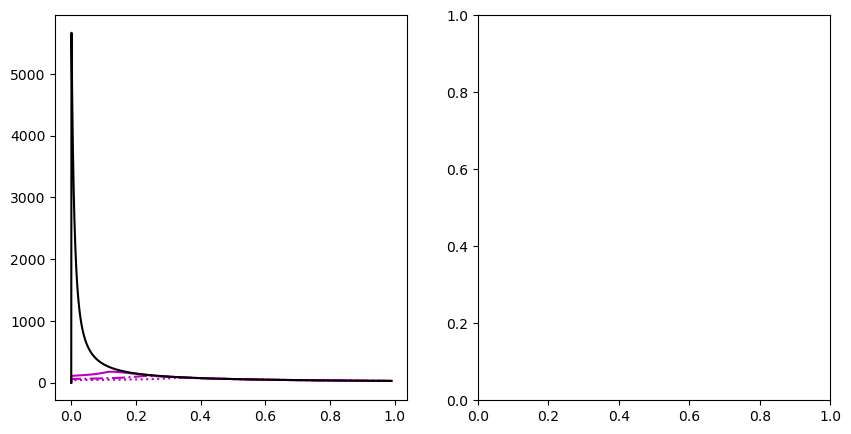

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Cu_200S_changeSi['F'],
         df_Cu_200S_changeSi['Cu_Melt_Agg'],
         '-.', color='m')
ax1.plot(df_Cu_300S_changeSi['F'],
         df_Cu_300S_changeSi['Cu_Melt_Agg'],
         ':', color='m')
ax1.plot(df_Cu_100S_changeSi['F'],
         df_Cu_100S_changeSi['Cu_Melt_Agg'],
         '-', color='m')
ax1.plot(df_Ba_200S_changeSi['F'],
         df_Ba_200S_changeSi['Ba_Melt_Agg'],
         '-', color='k')
         

In [ ]:
elx='Cu'
ely='100'
M=np.linspace(0, 1, 100)
Kd_Cu=M*0.1
df_out_S0=pd.DataFrame(data={'F': 1-M,
                        'M': M,                     
                    '{}_KD_{}'.format(elx, ely): Kd_Cu})
df_out_S0 

,F,M,Cu_KD_100
0,1.000000,0.000000,0.00000
1,0.989899,0.010101,0.00101
2,0.979798,0.020202,0.00202
3,0.969697,0.030303,0.00303
4,0.959596,0.040404,0.00404
...,...,...,...
95,0.040404,0.959596,0.09596
96,0.030303,0.969697,0.09697
97,0.020202,0.979798,0.09798
98,0.010101,0.989899,0.09899


In [ ]:
plt.plot(df_Ba_200S_changeSi['F'],
